<a href="https://colab.research.google.com/github/Narissarach/Project_eye/blob/main/model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model 1

*** การกำหนดขนาดจากเปเปอร์ (https://www.agi.nu.ac.th/nred/Document/is-PDF/2562/geo_2562_05_FullPaper.pdf) ***

In [46]:
import tensorflow as tf
import PIL
import time
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import pickle as p
import pathlib
import plotly
from tensorflow.keras.models import load_model
from tensorflow.keras.models import model_from_json
import plotly.graph_objs as go
from tensorflow import keras
from tensorflow.keras.models import Sequential

## เตรียมชุดของข้อมูล

In [47]:
from google.colab import drive # เชื่อม drive ของเรา ถ้าเชื่อมสำเร็จจะขึ้นคำว่า Mounted at /content/drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
batch_size = 10   # กำหนดขนาดของแต่ละการอ่านข้อมูล
img_height = 256  # ความสูงของรูปภาพแต่ละรูป
img_width = 256   # ความกว้างของรูปภาพแต่ละรูป

## Train

In [49]:
#Train
data_train = pathlib.Path('/content/drive/MyDrive/2022Project/for_code/train')
train = tf.keras.utils.image_dataset_from_directory(data_train,image_size=(img_height, img_width))

Found 1216 files belonging to 4 classes.


In [50]:
class_names = train.class_names
print(class_names)

['CSC', 'Normal', 'PCV', 'VKH']


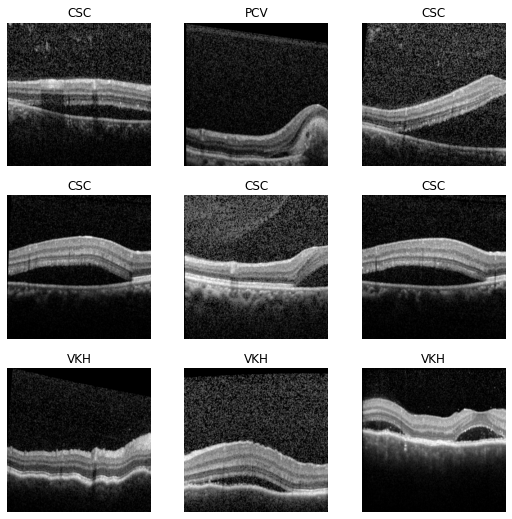

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 9)) #ขนาด
for images, labels in train.take(1):
  for i in range(9): #มี 9 รูป
    ax = plt.subplot(3, 3, i + 1) #แถวละ 3
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [52]:
for image_batch, labels_batch in train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


## Validation

In [53]:
#Validation
data_validation = pathlib.Path('/content/drive/MyDrive/2022Project/for_code/validation')
val = tf.keras.utils.image_dataset_from_directory(data_validation,image_size=(img_height, img_width))

Found 152 files belonging to 4 classes.


In [54]:
class_names = val.class_names
print(class_names)

['CSC', 'Normal', 'PCV', 'VKH']


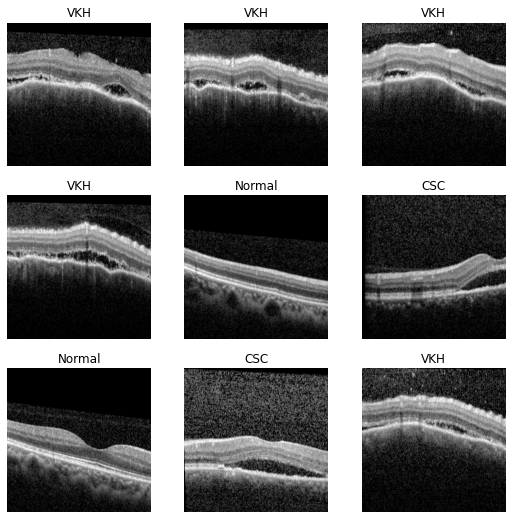

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 9)) #ขนาด
for images, labels in val.take(1):
  for i in range(9): #มี 9 รูป
    ax = plt.subplot(3, 3, i + 1) #แถวละ 3
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [56]:
for image_batch, labels_batch in val:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


## Test

In [57]:
#Test
data_test = pathlib.Path('/content/drive/MyDrive/2022Project/for_code/test')
test = tf.keras.utils.image_dataset_from_directory(data_test,image_size=(img_height, img_width))

Found 152 files belonging to 4 classes.


In [58]:
class_names = test.class_names
print(class_names)

['CSC', 'Normal', 'PCV', 'VKH']


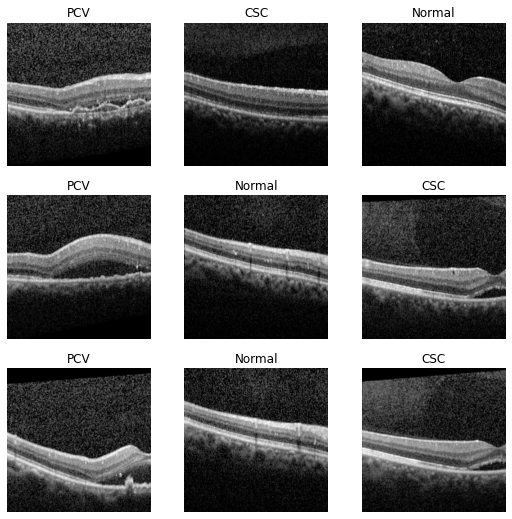

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 9)) #ขนาด
for images, labels in test.take(1):
  for i in range(9): #มี 9 รูป
    ax = plt.subplot(3, 3, i + 1) #แถวละ 3
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [60]:
for image_batch, labels_batch in test:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


## Normalization

In [61]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1. / 255)
normalized_ds = train.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 1.0


## Training

### Model

In [62]:
num_classes = 4
epochs=10   # จำนวนครั้งที่เราจะ Train

In [63]:
model = Sequential([
layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
layers.Conv2D(16, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(32, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(64, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Flatten(),
layers.Dense(128, activation='relu'),
layers.Dense(num_classes)
])

In [64]:
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 64)       

In [65]:
his = model.fit(
train,
validation_data=val,
epochs=epochs
)

Epoch 1/10
38/38 [==============================] - 91s 2s/step - loss: 1.3070 - accuracy: 0.4441 - val_loss: 1.6620 - val_accuracy: 0.3289
Epoch 2/10
38/38 [==============================] - 86s 2s/step - loss: 0.6989 - accuracy: 0.7451 - val_loss: 2.4466 - val_accuracy: 0.2895
Epoch 3/10
38/38 [==============================] - 88s 2s/step - loss: 0.3055 - accuracy: 0.8972 - val_loss: 2.6860 - val_accuracy: 0.3092
Epoch 4/10
38/38 [==============================] - 86s 2s/step - loss: 0.1776 - accuracy: 0.9515 - val_loss: 3.5366 - val_accuracy: 0.2105
Epoch 5/10
38/38 [==============================] - 90s 2s/step - loss: 0.0519 - accuracy: 0.9885 - val_loss: 4.2828 - val_accuracy: 0.2500
Epoch 6/10
38/38 [==============================] - 91s 2s/step - loss: 0.0459 - accuracy: 0.9860 - val_loss: 3.9080 - val_accuracy: 0.3355
Epoch 7/10
38/38 [==============================] - 87s 2s/step - loss: 0.0183 - accuracy: 0.9959 - val_loss: 5.0050 - val_accuracy: 0.3026
Epoch 8/10
38/38 [==

### Save Model

In [66]:
with open('history_model', 'wb') as file:
   p.dump(his.history, file)

filepath='model1.h5'
model.save(filepath)
filepath_model = 'model1.json'
filepath_weights = 'weights_model.h5'
model_json = model.to_json()
with open(filepath_model, "w") as json_file:
   json_file.write(model_json)

model.save_weights('weights_model.h5')
print("Saved model to disk")

Saved model to disk


### Load Model

In [67]:
with open('history_model', 'rb') as file:
   his = p.load(file)

h1 = go.Scatter(y=his['loss'],
mode="lines", line=dict(
width=2,
color='blue'),
name="loss"
)
h2 = go.Scatter(y=his['val_loss'],
mode="lines", line=dict(
width=2,
color='red'),
name="val_loss"
)

data = [h1,h2]
layout1 = go.Layout(title='Loss',
xaxis=dict(title='epochs'),
yaxis=dict(title=' '))
fig1 = go.Figure(data, layout=layout1)
plotly.offline.iplot(fig1, filename="testMNIST")
predict_model = load_model(filepath)
predict_model.summary()
with open(filepath_model, 'r') as f:
   loaded_model_json = f.read()
predict_model = model_from_json(loaded_model_json)
predict_model.load_weights(filepath_weights)
print("Loaded model from disk")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 64)       

### Prediction

In [68]:
import requests
from IPython.display import Image
from io import BytesIO

1/1 [==============================] - 0s 106ms/step
CSC tf.Tensor(0.1038811, shape=(), dtype=float32) Normal tf.Tensor(0.5232811, shape=(), dtype=float32) PCV tf.Tensor(0.36561316, shape=(), dtype=float32) VKH tf.Tensor(0.0072246296, shape=(), dtype=float32)


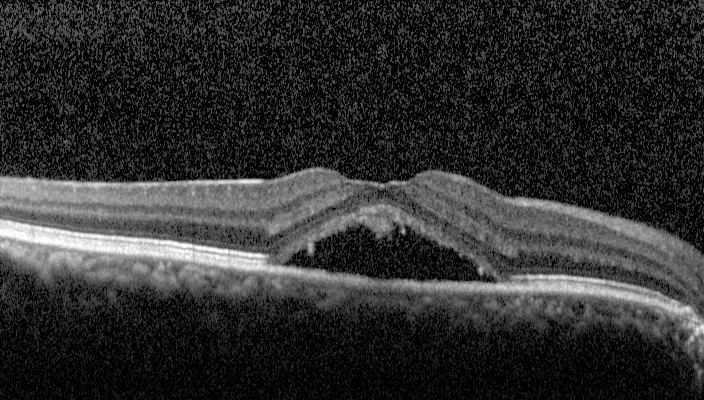

AI Normal มีความมั่นใจ 52.33%.


In [69]:
# CSC
test_path = ('/content/drive/MyDrive/2022Project/Project/Test/CSC/FQ8979 23-03-12 RE_000_cropped.png')
img = keras.preprocessing.image.load_img(
test_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
predictions = predict_model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print("CSC",score[0],"Normal",score[1],"PCV",score[2],"VKH",score[3])
display(Image(filename=test_path,width=180, height=180))
if score[0]==np.max(score):
  eye = "CSC"
elif score[1]==np.max(score):
  eye = "Normal"
elif score[2]==np.max(score):
  eye = "PCV"
elif score[3]==np.max(score):
  eye = "VKH"
print(
"AI {} มีความมั่นใจ {:.2f}%."
.format(eye, 100 * np.max(score))
)

1/1 [==============================] - 0s 102ms/step
CSC tf.Tensor(0.15117109, shape=(), dtype=float32) Normal tf.Tensor(0.84859735, shape=(), dtype=float32) PCV tf.Tensor(2.0991988e-06, shape=(), dtype=float32) VKH tf.Tensor(0.000229423, shape=(), dtype=float32)


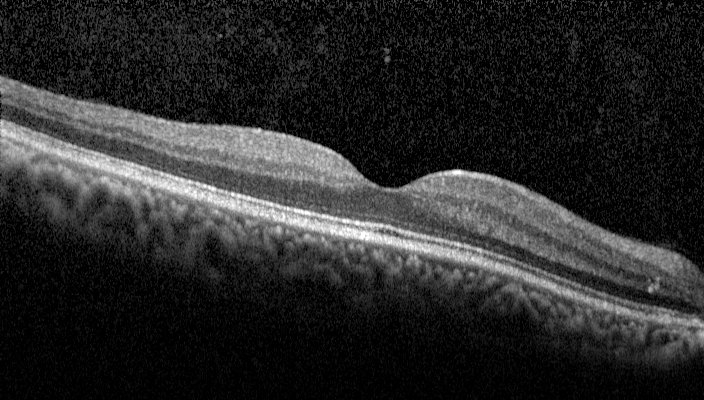

AI Normal มีความมั่นใจ 84.86%.


In [70]:
# Normal
test_path = ('/content/drive/MyDrive/2022Project/Project/Test/Normal/CJ5901 24-01-19 RE_000_cropped.png')
img = keras.preprocessing.image.load_img(
test_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
predictions = predict_model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print("CSC",score[0],"Normal",score[1],"PCV",score[2],"VKH",score[3])
display(Image(filename=test_path,width=180, height=180))
if score[0]==np.max(score):
  eye = "CSC"
elif score[1]==np.max(score):
  eye = "Normal"
elif score[2]==np.max(score):
  eye = "PCV"
elif score[3]==np.max(score):
  eye = "VKH"
print(
"AI {} มีความมั่นใจ {:.2f}%."
.format(eye, 100 * np.max(score))
)

1/1 [==============================] - 0s 41ms/step
CSC tf.Tensor(0.99990904, shape=(), dtype=float32) Normal tf.Tensor(6.7777305e-06, shape=(), dtype=float32) PCV tf.Tensor(9.708424e-07, shape=(), dtype=float32) VKH tf.Tensor(8.321012e-05, shape=(), dtype=float32)


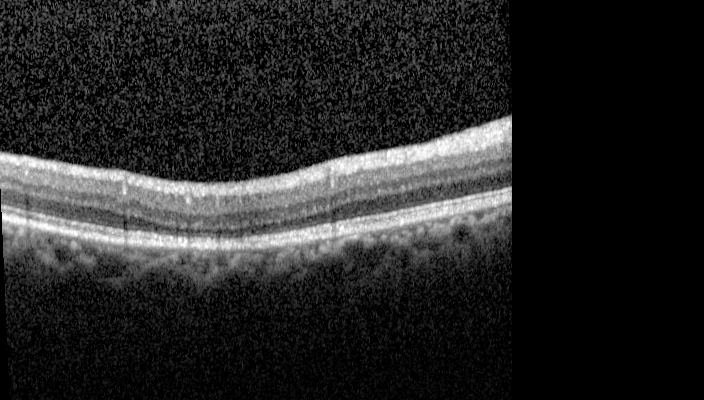

AI CSC มีความมั่นใจ 99.99%.


In [71]:
# PCV
test_path = ('/content/drive/MyDrive/2022Project/Project/Test/PCV/AV0940 20-02-15 RE_000000_cropped.png')
img = keras.preprocessing.image.load_img(
test_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
predictions = predict_model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print("CSC",score[0],"Normal",score[1],"PCV",score[2],"VKH",score[3])
display(Image(filename=test_path,width=180, height=180))
if score[0]==np.max(score):
  eye = "CSC"
elif score[1]==np.max(score):
  eye = "Normal"
elif score[2]==np.max(score):
  eye = "PCV"
elif score[3]==np.max(score):
  eye = "VKH"
print(
"AI {} มีความมั่นใจ {:.2f}%."
.format(eye, 100 * np.max(score))
)

1/1 [==============================] - 0s 52ms/step
CSC tf.Tensor(0.47865674, shape=(), dtype=float32) Normal tf.Tensor(2.5681398e-05, shape=(), dtype=float32) PCV tf.Tensor(0.030148868, shape=(), dtype=float32) VKH tf.Tensor(0.49116874, shape=(), dtype=float32)


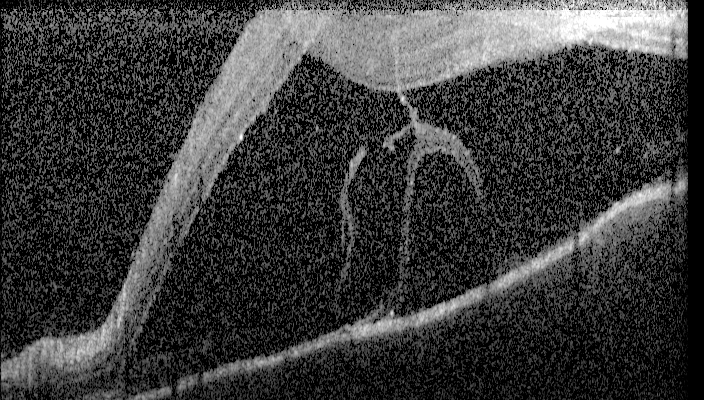

AI VKH มีความมั่นใจ 49.12%.


In [72]:
# VKH
test_path = ('/content/drive/MyDrive/2022Project/Project/Test/VKH/KH7322 18-12-20 LE_000000_cropped.png')
img = keras.preprocessing.image.load_img(
test_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
predictions = predict_model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print("CSC",score[0],"Normal",score[1],"PCV",score[2],"VKH",score[3])
display(Image(filename=test_path,width=180, height=180))
if score[0]==np.max(score):
  eye = "CSC"
elif score[1]==np.max(score):
  eye = "Normal"
elif score[2]==np.max(score):
  eye = "PCV"
elif score[3]==np.max(score):
  eye = "VKH"
print(
"AI {} มีความมั่นใจ {:.2f}%."
.format(eye, 100 * np.max(score))
)

### Testing

In [87]:
y_test = []; y_pred = []
class_names = test.class_names
for images, labels in test:
  for i in range(len(list(labels))):
    img_array = keras.preprocessing.image.img_to_array(images[i])
    X_test = tf.expand_dims(img_array, 0)
    score = predict_model.predict(X_test)
    if score[0][0]==np.max(score):
      eye = "CSC"
    elif score[0][1]==np.max(score):
      eye = "Normal"
    elif score[0][2]==np.max(score):
      eye = "PCV"
    elif score[0][3]==np.max(score):
      eye = "VKH"
    y_pred.append(eye)
    y_test.append(class_names[labels[i]])

1/1 [==============================] - 0s 42ms/step


In [88]:
print(y_test)
print(len(y_test))
print(y_pred)
print(len(y_pred))

['Normal', 'PCV', 'CSC', 'PCV', 'Normal', 'Normal', 'CSC', 'Normal', 'CSC', 'PCV', 'VKH', 'Normal', 'PCV', 'PCV', 'CSC', 'VKH', 'Normal', 'Normal', 'VKH', 'CSC', 'PCV', 'CSC', 'Normal', 'Normal', 'PCV', 'VKH', 'CSC', 'PCV', 'Normal', 'VKH', 'PCV', 'VKH', 'CSC', 'PCV', 'Normal', 'PCV', 'Normal', 'PCV', 'CSC', 'CSC', 'VKH', 'Normal', 'VKH', 'CSC', 'VKH', 'Normal', 'Normal', 'VKH', 'CSC', 'PCV', 'PCV', 'VKH', 'PCV', 'VKH', 'PCV', 'PCV', 'CSC', 'CSC', 'PCV', 'CSC', 'VKH', 'VKH', 'CSC', 'PCV', 'PCV', 'CSC', 'PCV', 'Normal', 'CSC', 'VKH', 'VKH', 'CSC', 'CSC', 'PCV', 'CSC', 'VKH', 'VKH', 'PCV', 'Normal', 'CSC', 'Normal', 'VKH', 'VKH', 'Normal', 'VKH', 'Normal', 'VKH', 'CSC', 'VKH', 'PCV', 'Normal', 'PCV', 'Normal', 'VKH', 'CSC', 'Normal', 'VKH', 'VKH', 'CSC', 'PCV', 'Normal', 'PCV', 'Normal', 'VKH', 'Normal', 'VKH', 'Normal', 'Normal', 'Normal', 'PCV', 'CSC', 'CSC', 'Normal', 'VKH', 'CSC', 'CSC', 'VKH', 'CSC', 'PCV', 'PCV', 'VKH', 'VKH', 'Normal', 'Normal', 'VKH', 'Normal', 'CSC', 'CSC', 'PCV

## Confusion Matrix

In [89]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [90]:
confusion_matrix(y_test, y_pred)

array([[19,  0,  7, 12],
       [ 0, 29,  0,  9],
       [12,  3, 23,  0],
       [ 3,  1, 18, 16]])

In [91]:
cm = confusion_matrix(y_test, y_pred)

In [92]:
test.class_names

['CSC', 'Normal', 'PCV', 'VKH']

In [93]:
cm_df = pd.DataFrame(cm,
                     index = ['CSC', 'Normal', 'PCV', 'VKH'], 
                     columns = ['CSC', 'Normal', 'PCV', 'VKH'])

In [94]:
cm_df

,CSC,Normal,PCV,VKH
CSC,19,0,7,12
Normal,0,29,0,9
PCV,12,3,23,0
VKH,3,1,18,16


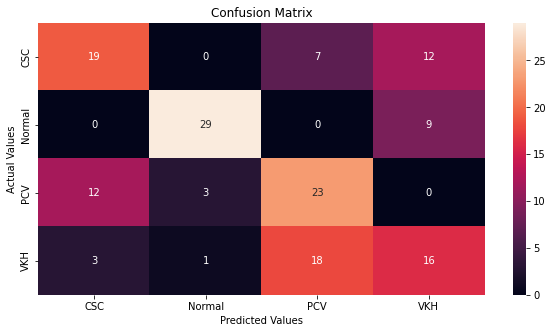

In [95]:
plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()
     

### หาค่า Accuracy,Recall, Precision, F1-score

In [82]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [83]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)

Accuracy: 0.572368


In [84]:
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred, average='weighted') ### ในส่วนของ average='weighted' หนูไม่มั่นใจว่าควรใส่เป็น macro, micro หรือ weight
print('Recall: %f' % recall)

Recall: 0.572368


In [85]:
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred, average='weighted') ### ในส่วนของ average='weighted' หนูไม่มั่นใจว่าควรใส่เป็น macro, micro หรือ weight
print('Precision: %f' % precision)

Precision: 0.587303


In [86]:
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred, average='weighted') ### ในส่วนของ average='weighted' หนูไม่มั่นใจว่าควรใส่เป็น macro, micro หรือ weight
print('F1 score: %f' % f1)

F1 score: 0.576557


## Learning curve

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import learning_curve